In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)


Loading BokehJS ...

In [2]:
irisDf = pd.read_excel('./data/titanic3.xls')

In [3]:
irisDf.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [4]:
irisDf.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [5]:
irisDf.var()

pclass         0.701969
survived       0.236250
age          207.748974
sibsp          1.085052
parch          0.749195
fare        2678.959738
body        9544.688567
dtype: float64

In [6]:
irisDf.skew()

pclass     -0.598647
survived    0.486404
age         0.407672
sibsp       3.844220
parch       3.669078
fare        4.367709
body        0.091739
dtype: float64

In [7]:
irisDf.corr()

pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629 -0.034642
survived -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265       NaN
age      -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739  0.058809
sibsp     0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238 -0.099961
parch     0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539  0.051099
fare     -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000 -0.043110
body     -0.034642       NaN  0.058809 -0.099961  0.051099 -0.043110  1.000000

In [8]:
irisDf.select_dtypes(include=[np.number]).columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')

In [26]:
irisDf.fillna(method='pad', inplace=True)

# Correlation btw Numerical Columns


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


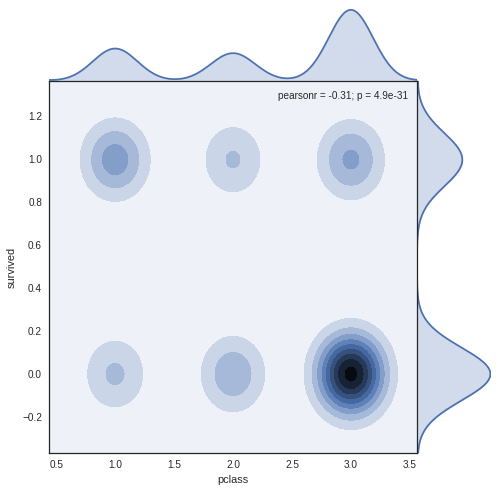

In [27]:
analyze.correlation_analyze(irisDf, #exclude_columns='Id',
                                'pclass', 
                                'survived',)
                                #categories=['sex', 'cabin', 'home.dest'])

Variance of pclass
0.701969194684
Skewness of pclass
-0.59864711028
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
Anderson-Darling normality test on pclass 
Statistic: 157.928244 
 p-value: 0.000000



Column(id='8d3350ce-7ba1-43db-a2bc-557e841d97cc', ...)

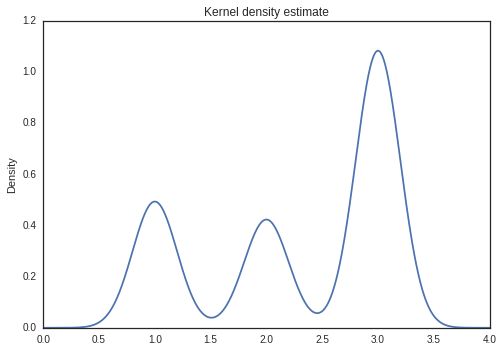

In [15]:
analyze.dist_analyze(irisDf, 'pclass')

In [20]:
analyze.dist_analyze(irisDf, 'age')

Variance of age
207.7489736
Skewness of age
0.407671886498
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=nan, pvalue=nan)
Anderson-Darling normality test on age 
Statistic: nan 
 p-value: 0.000000



/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


ValueError: range parameter must be finite.

In [25]:
analyze.regression_analyze(irisDf, 'age', 'fare', check_vif=False, check_heteroskedasticity=False)

P-value and test statistic for distribution similarity between age and fare
(0.98592999999999997, -3.2483728800611154)
Regression Score: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.0247252618632
Regression Score: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
0.0247252618628
Regression Score: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
0.0247252618263
Regression Score: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.0247233709119
Regression Score: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.00

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/datascienceutils-1.2.19-py3.5.egg/datascienceutils/predictiveModels.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  source = dataframe[column].reshape((len(target), 1)).tolist()


In [18]:
irisDf.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON